In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.units as u

# Optional settings for the plots. Comment out if needed.
import seaborn as sb
sb.set_context('poster')

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12., 9.6)
import numpy as np

In [24]:
from fil_finder import FilFinder2D
from astropy.io import fits

hdu = fits.open(r'C:\Users\shari\Documents\YR 4 Project\My work\Images\cut266.fits', ignore_missing_end=True)[0]

fil = FilFinder2D(hdu, distance= 8000*u.pc, beamwidth=2.222222*10**(-3)*u.deg)

In [25]:
min_ = np.min(hdu.data)
std = np.std(hdu.data)
av = np.mean(hdu.data)

In [26]:
fil.preprocess_image(flatten_percent=95)

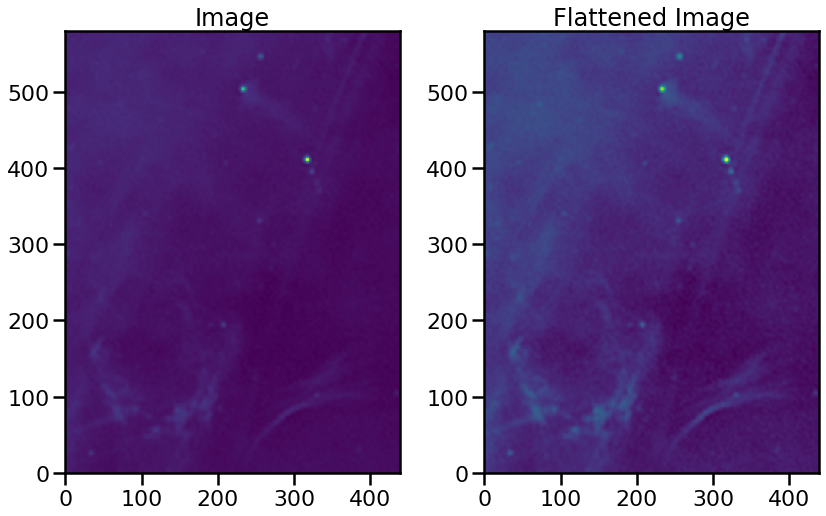

In [27]:
plt.subplot(121)
plt.imshow(fil.image.value, origin='lower')
plt.title("Image")
plt.subplot(122)
plt.imshow(fil.flat_img.value, origin='lower')
plt.title("Flattened Image")
plt.tight_layout()

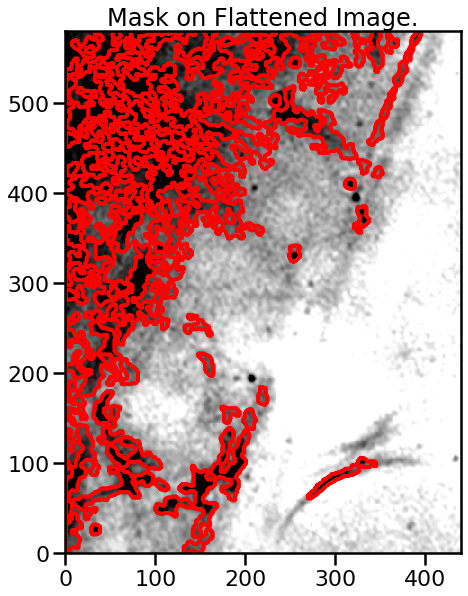

In [28]:
#fil.create_mask(verbose=True, border_masking=False, size_thresh = 10*u.pc**2, glob_thresh = av+0.01*std, smooth_size = 0.7*u.p
#fil.create_mask(verbose=True, border_masking=False, size_thresh = 10*u.pc**2, glob_thresh = av+0.5*std, adapt_thresh = 0.5*u.pc)
fil.create_mask(verbose=True, border_masking=False, glob_thresh = av+0.2*std, adapt_thresh = 0.5*u.pc)

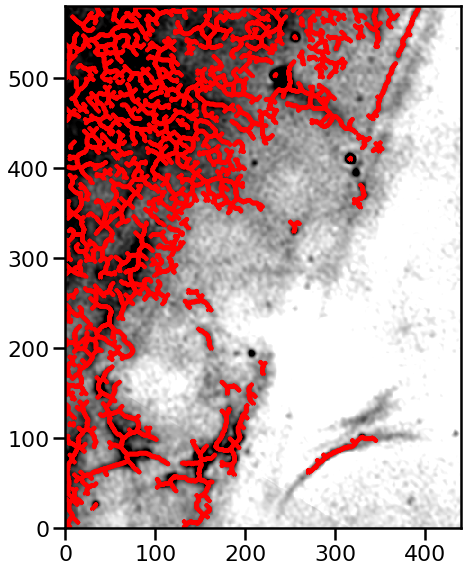

In [29]:
fil.medskel(verbose=True)

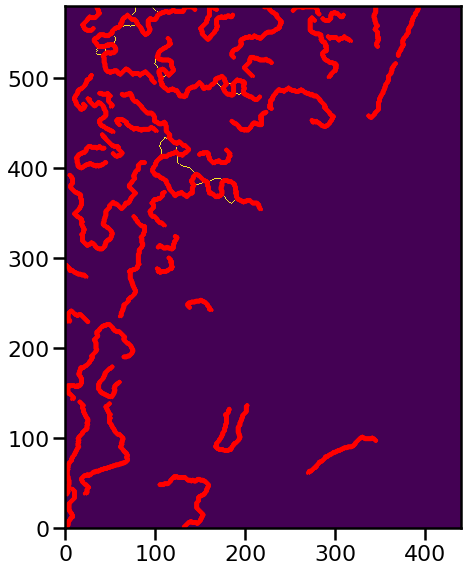

In [30]:
fil.analyze_skeletons(branch_thresh=70 * u.pix, prune_criteria='length')
plt.imshow(fil.skeleton, origin='lower')
plt.contour(fil.skeleton_longpath, colors='r')

In [374]:
fil.filaments

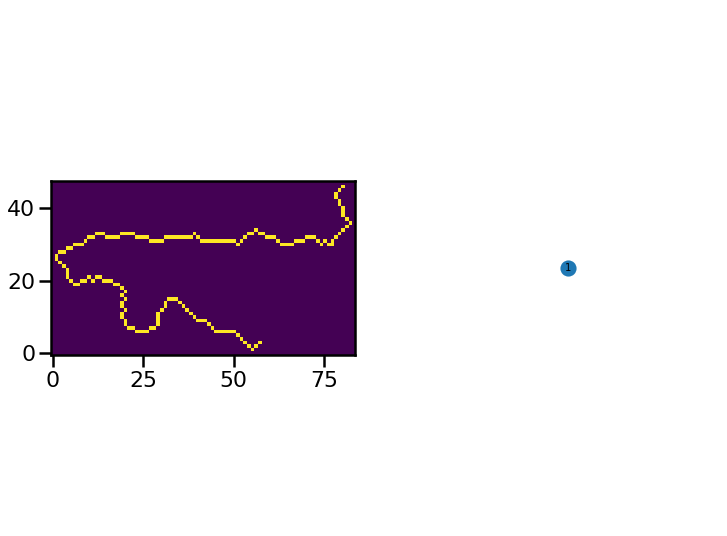

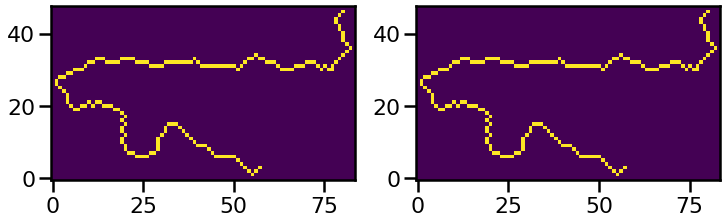

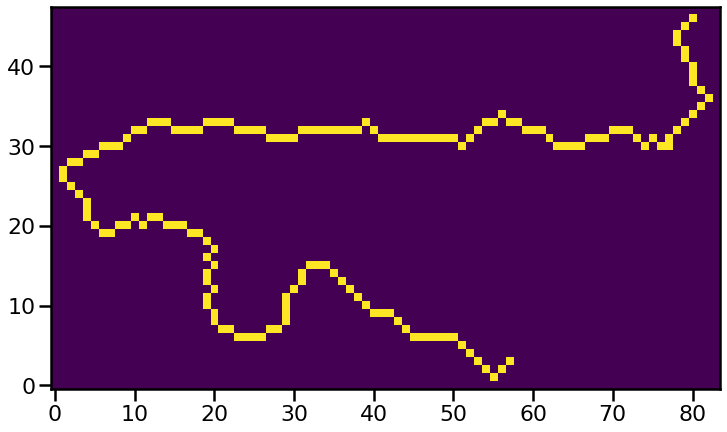

In [23]:
fil1 = fil.filaments[1]
fil1.skeleton_analysis(fil.image, verbose=True)


In [ ]:
fil.lengths(u.pc)

In [ ]:
fil.branch_properties.keys()

In [ ]:
fil.branch_properties['length']

In [ ]:
fil.branch_properties['intensity']

In [ ]:
fil.exec_rht()
fil1.plot_rht_distrib()

In [ ]:
fil.orientation

In [ ]:
fil.curvature

In [ ]:
fil.exec_rht(branches=True, min_branch_length=5 * u.pix)

In [ ]:
_ = plt.hist(fil.orientation_branches[0].value, bins=10)
plt.xlabel("Orientation (rad)")

In [ ]:
all_orient = np.array([orient.value for fil_orient in fil.orientation_branches for orient in fil_orient])
# Short, excluded branches have NaNs
all_orient = all_orient[np.isfinite(all_orient)]

_ = plt.hist(all_orient, bins=10)
plt.xlabel("Orientation (rad)")

In [ ]:
fil.find_widths()
fil1.plot_radial_profile(xunit=u.pc)

In [ ]:
fil.filaments[0].plot_radial_profile(xunit=u.pc)

In [ ]:
fil.total_intensity()

In [ ]:
fil.median_brightness()

In [ ]:
fil_mod = fil.filament_model()
plt.imshow(fil_mod)
plt.colorbar()

In [ ]:
fil.covering_fraction()

In [ ]:
profs = fil.ridge_profiles()
plt.subplot(211)
plt.plot(profs[0])
plt.subplot(212)
plt.plot(profs[1])
plt.tight_layout()

In [ ]:
fil.output_table(xunit=u.pc)

In [ ]:
#fil.save_fits()
